In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# kitti

In [ ]:
kit_dir = '/content/drive/MyDrive/IDL/Project/kitti'

In [ ]:
kit_list = os.listdir(kit_dir+'/image_left')

In [ ]:
def kitti_disparity(dir, data_list, stereo):
  for i in range(len(data_list)):
    imgL = cv2.imread(dir+'/image_left/'+data_list[i], 0)
    imgR = cv2.imread(dir+'/image_right/'+data_list[i], 0)

    print(imgL.shape)

    # imgL = cv2.resize(src = imgL, dsize = [960, 540])
    # imgR = cv2.resize(src = imgR, dsize = [960, 540])

    imgL_color = cv2.imread(dir+'/image_left/'+data_list[i], cv2.IMREAD_COLOR)
    imgR_color = cv2.imread(dir+'/image_right/'+data_list[i], cv2.IMREAD_COLOR)

    imgL_color = cv2.cvtColor(imgL_color, cv2.COLOR_BGR2RGB)
    imgR_color = cv2.cvtColor(imgR_color, cv2.COLOR_BGR2RGB)
    
    disparity = stereo.compute(imgL, imgR)

    plt.figure(figsize=(15, 30))

    plt.subplot(131)
    plt.axis('off')
    plt.imshow(disparity, 'jet')

    plt.subplot(132)
    plt.axis('off')
    plt.imshow(imgL_color)

    plt.subplot(133)
    plt.axis('off')
    plt.imshow(imgR_color)

    plt.show()

(375, 1242)


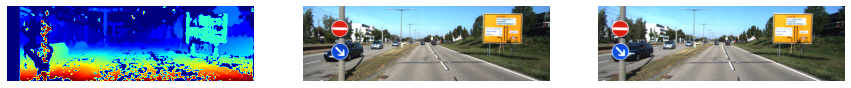

(375, 1242)


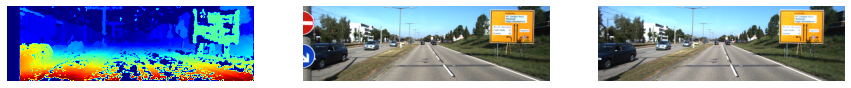

(375, 1242)


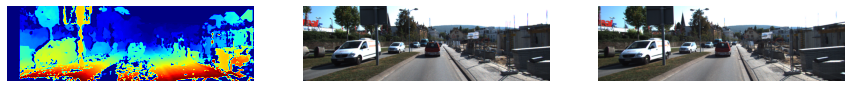

(375, 1242)


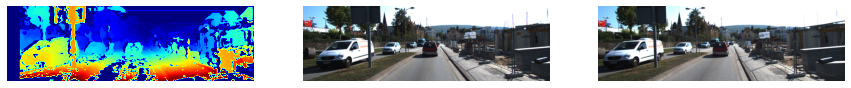

(375, 1242)


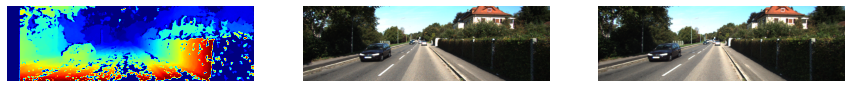

(375, 1242)


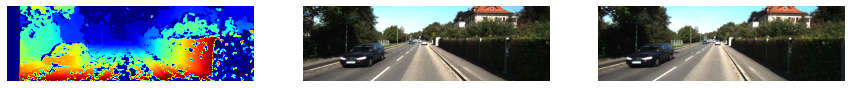

(375, 1242)


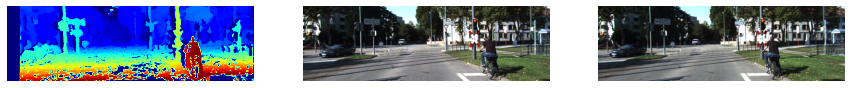

(375, 1242)


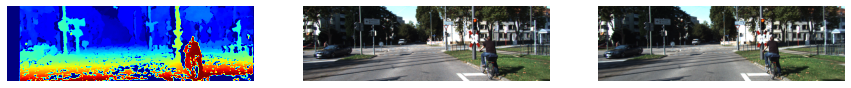

(375, 1242)


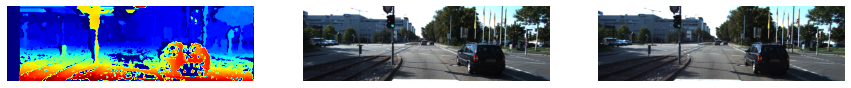

(375, 1242)


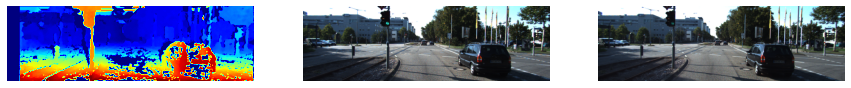

In [ ]:
blockSize = 13
uniquenessRatio = 6
speckleRange = 4
speckleWindow = 100
num_disp = 64


stereo1 = cv2.StereoSGBM_create(minDisparity = 0,
                numDisparities = num_disp,
                 blockSize = blockSize,
                 uniquenessRatio = uniquenessRatio,
                 speckleWindowSize = speckleWindow,
                 speckleRange = speckleRange,
                 disp12MaxDiff = 1,
                 P1 = 0,
                 P2 = 0)

kitti_disparity(kit_dir, kit_list, stereo1)

(375, 1242)


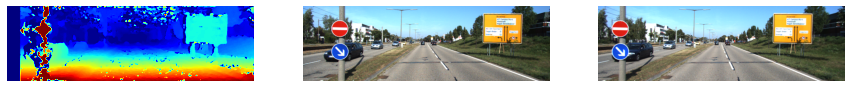

(375, 1242)


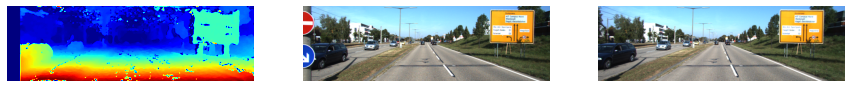

(375, 1242)


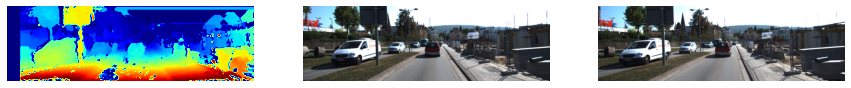

(375, 1242)


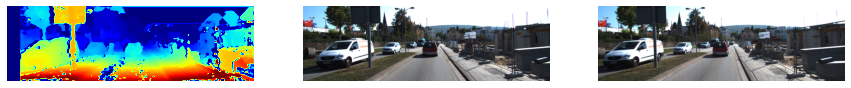

(375, 1242)


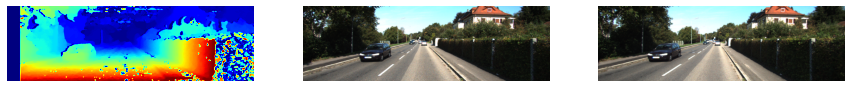

(375, 1242)


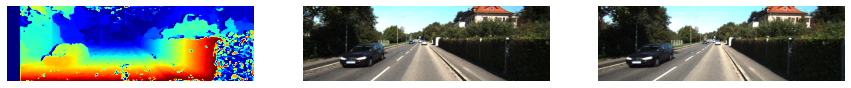

(375, 1242)


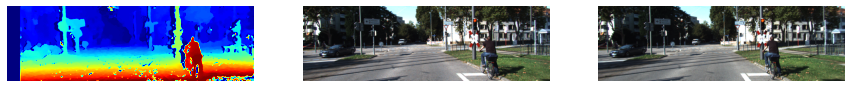

(375, 1242)


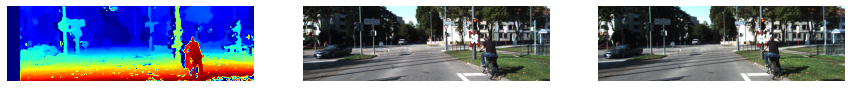

(375, 1242)


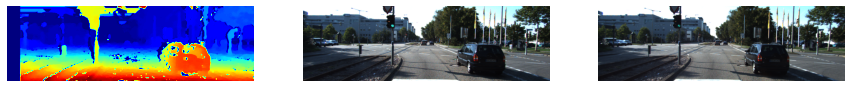

(375, 1242)


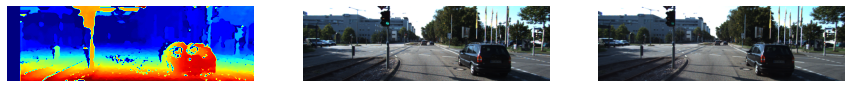

In [ ]:
blockSize = 13
uniquenessRatio = 5
speckleRange = 3
speckleWindow = 20
num_disp = 64


stereo2 = cv2.StereoSGBM_create(minDisparity = 2,
                 numDisparities = num_disp,
                 blockSize = blockSize,
                 uniquenessRatio = uniquenessRatio,
                 speckleWindowSize = speckleWindow,
                 speckleRange = speckleRange,
                 disp12MaxDiff = 1,
                 P1 = blockSize*blockSize*3,
                 P2 = 4*blockSize*blockSize*3)

kitti_disparity(kit_dir, kit_list, stereo2)

# Our dataset

In [ ]:
real_dir = '/content/drive/MyDrive/IDL/Project/real'

In [ ]:
image_dir = sorted(os.listdir(real_dir))

# image names
image_idx = [image[:-9] for image in image_dir[::2]]

In [ ]:
# gdrive에서 생성된 불필요한 파일 제외
image_idx = image_idx[1:-2]

(540, 960, 3)

## Disparity map

version 1 : Only for real data

In [ ]:
for i in range(len(image_idx)):
    # imread: 0 = gray, 1 = color
    imgL = cv2.imread(real_dir+'/'+image_idx[i]+'_left.png', cv2.IMREAD_COLOR)
    imgR = cv2.imread(real_dir+'/'+image_idx[i]+'_right.png', cv2.IMREAD_COLOR)

    imgL_color = cv2.imread(real_dir+'/'+image_idx[i]+'_left.png', cv2.IMREAD_COLOR)
    imgR_color = cv2.imread(real_dir+'/'+image_idx[i]+'_right.png', cv2.IMREAD_COLOR)

    imgL_color = cv2.cvtColor(imgL_color, cv2.COLOR_BGR2RGB)
    imgR_color = cv2.cvtColor(imgR_color, cv2.COLOR_BGR2RGB)

    blockSize = 13
    uniquenessRatio = 6
    speckleRange = 3
    speckleWindow = 10
    num_disp = 64

    stereo = cv2.StereoSGBM_create(minDisparity = 0,
                 numDisparities = num_disp,
                 blockSize = blockSize,
                 uniquenessRatio = uniquenessRatio,
                 speckleWindowSize = speckleWindow,
                 speckleRange = speckleRange,
                 disp12MaxDiff = 2,
                 P1 = blockSize * blockSize,
                 P2 = 4 * blockSize * blockSize)

    disparity = stereo.compute(imgL, imgR)
    
    # displays image as grayscale and plotted
    plt.figure(figsize=(15, 30))

    plt.subplot(131)
    plt.axis('off')
    plt.imshow(disparity, 'jet')

    plt.subplot(132)
    plt.axis('off')
    plt.imshow(imgL_color)

    plt.subplot(133)
    plt.axis('off')
    plt.imshow(imgR_color)

    plt.show()

Version 2 : Talha's code

In [ ]:
for i in range(len(image_idx)):
    # imread: 0 = gray, 1 = color
    imgL = cv2.imread(real_dir+'/'+image_idx[i]+'_left.png', 0)
    imgR = cv2.imread(real_dir+'/'+image_idx[i]+'_right.png', 0)

    imgL_color = cv2.imread(real_dir+'/'+image_idx[i]+'_left.png', cv2.IMREAD_COLOR)
    imgR_color = cv2.imread(real_dir+'/'+image_idx[i]+'_right.png', cv2.IMREAD_COLOR)

    imgL_color = cv2.cvtColor(imgL_color, cv2.COLOR_BGR2RGB)
    imgR_color = cv2.cvtColor(imgR_color, cv2.COLOR_BGR2RGB)

    blockSize = 13
    uniquenessRatio = 6
    speckleRange = 4
    speckleWindow = 100
    num_disp = 128

    stereo = cv2.StereoSGBM_create(minDisparity = 0,
                 numDisparities = num_disp,
                 blockSize = blockSize,
                 uniquenessRatio = uniquenessRatio,
                 speckleWindowSize = speckleWindow,
                 speckleRange = speckleRange,
                 disp12MaxDiff = 1,
                 P1 = 0,
                 P2 = 0)

    disparity = stereo.compute(imgL, imgR)
    
    # displays image as grayscale and plotted
    plt.figure(figsize=(15, 30))

    plt.subplot(131)
    plt.axis('off')
    plt.imshow(disparity, 'jet')

    plt.subplot(132)
    plt.axis('off')
    plt.imshow(imgL_color)

    plt.subplot(133)
    plt.axis('off')
    plt.imshow(imgR_color)

    plt.show()

Version 3 : For both kitti and real-data

In [ ]:
for i in range(len(image_idx)):
    # imread: 0 = gray, 1 = color
    imgL = cv2.imread(real_dir+'/'+image_idx[i]+'_left.png', cv2.IMREAD_COLOR)
    imgR = cv2.imread(real_dir+'/'+image_idx[i]+'_right.png', cv2.IMREAD_COLOR)

    imgL_color = cv2.imread(real_dir+'/'+image_idx[i]+'_left.png', cv2.IMREAD_COLOR)
    imgR_color = cv2.imread(real_dir+'/'+image_idx[i]+'_right.png', cv2.IMREAD_COLOR)

    imgL_color = cv2.cvtColor(imgL_color, cv2.COLOR_BGR2RGB)
    imgR_color = cv2.cvtColor(imgR_color, cv2.COLOR_BGR2RGB)

    blockSize = 13
    uniquenessRatio = 5
    speckleRange = 3
    speckleWindow = 20
    num_disp = 64


    stereo2 = cv2.StereoSGBM_create(minDisparity = 2,
                    numDisparities = num_disp,
                    blockSize = blockSize,
                    uniquenessRatio = uniquenessRatio,
                    speckleWindowSize = speckleWindow,
                    speckleRange = speckleRange,
                    disp12MaxDiff = 1,
                    P1 = blockSize*blockSize*3,
                    P2 = 4*blockSize*blockSize*3)

    disparity = stereo2.compute(imgL, imgR)
    
    # displays image as grayscale and plotted
    plt.figure(figsize=(15, 30))

    plt.subplot(131)
    plt.axis('off')
    plt.imshow(disparity, 'jet')

    plt.subplot(132)
    plt.axis('off')
    plt.imshow(imgL_color)

    plt.subplot(133)
    plt.axis('off')
    plt.imshow(imgR_color)

    plt.show()